In [1]:
import torch

In [42]:
PATH = "best_model.pth"
model = torch.load(PATH, weights_only=False, map_location=torch.device('cpu'))
model

In [28]:
model['user_embedding.weight'].shape
model['item_embedding.weight'].shape

torch.Size([1373, 128])

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=0)
kmeans.fit(model['item_embedding.weight'].numpy())
labels = kmeans.labels_
labels

array([ 3, 16,  3, ...,  3,  5, 19])

In [41]:
from sklearn.metrics import silhouette_score
silhouette_score(embeddings, labels)

0.00532744824886322

C:\Users\angel\AppData\Local\Temp\ipykernel_30272\944386535.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=embeddings_2d[:,0], y=embeddings_2d[:,1], palette="viridis", legend="full", alpha=0.7)


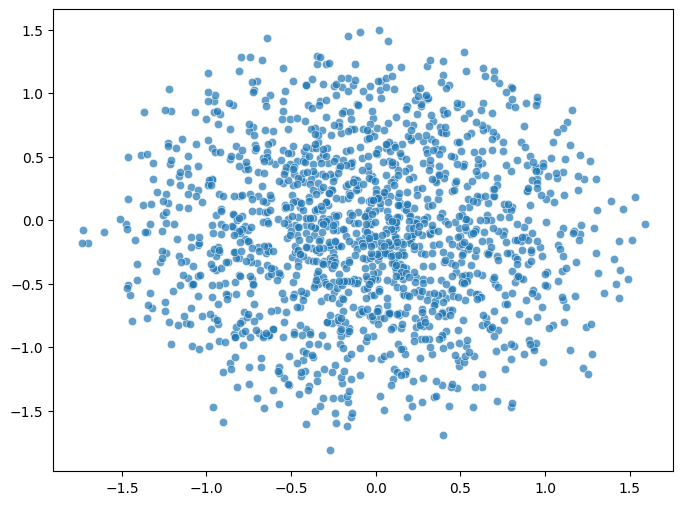

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

embeddings = model['user_embedding.weight'].numpy()

tsne = TSNE(n_components=2, random_state=42, perplexity=50, max_iter=3000)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=embeddings_2d[:,0], y=embeddings_2d[:,1], palette="viridis", legend="full", alpha=0.7)
plt.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_30272\3926273930.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=embeddings_2d[:,0], y=embeddings_2d[:,1], c=labels, palette="viridis", legend="full", alpha=0.7)


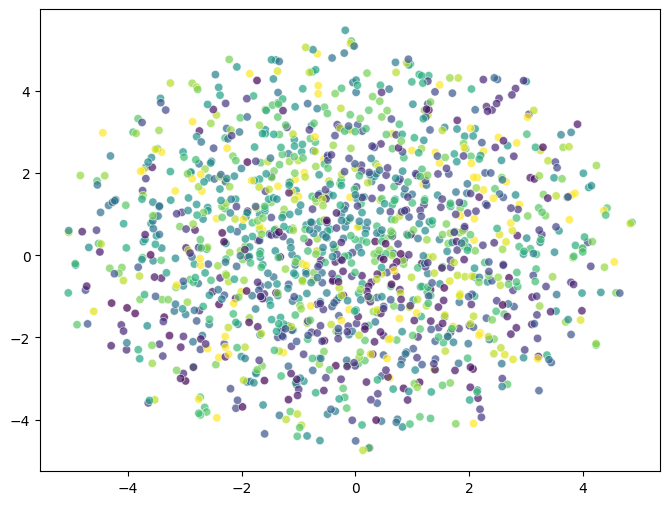

In [40]:
embeddings = model['item_embedding.weight'].numpy()

tsne = TSNE(n_components=2, random_state=42, perplexity=50, max_iter=3000)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=embeddings_2d[:,0], y=embeddings_2d[:,1], c=labels, palette="viridis", legend="full", alpha=0.7)
plt.show()

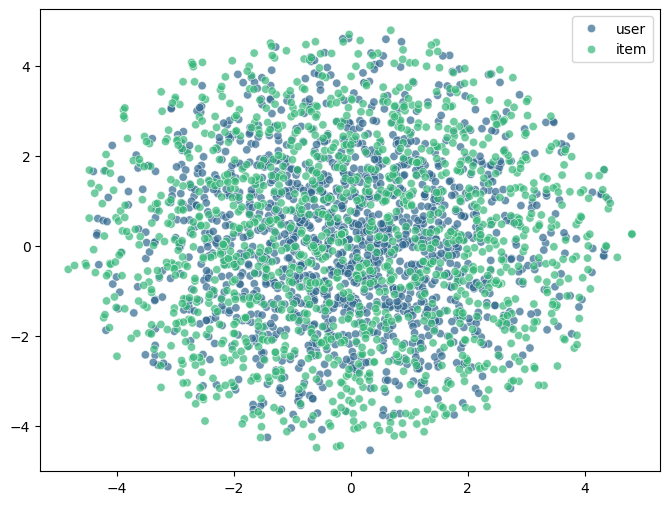

In [36]:
user_embeddings = model['user_embedding.weight'].detach().cpu().numpy()
item_embeddings = model['item_embedding.weight'].detach().cpu().numpy()
embeddings = np.concatenate([user_embeddings, item_embeddings], axis=0)
labels = np.array(['user'] * user_embeddings.shape[0] + ['item'] * item_embeddings.shape[0])

tsne = TSNE(n_components=2, random_state=42, perplexity=50, max_iter=3000)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=embeddings_2d[:,0], y=embeddings_2d[:,1], hue=labels, palette="viridis", legend="full", alpha=0.7)
plt.show()